In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [ ]:
df=pd.read_csv('/content/KaggleV2-May-2016.csv')

In [ ]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [ ]:
df.shape

(110527, 14)

In [ ]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [ ]:
df['PatientId']=df['PatientId'].astype('object')

In [ ]:
df['ScheduledDay']=pd.to_datetime(df['ScheduledDay']).dt.date.astype('datetime64[ns]')
df['AppointmentDay'] = pd.to_datetime(df['AppointmentDay']).dt.date.astype('datetime64[ns]')

In [ ]:
df = df.rename(columns={'Hipertension': 'Hypertension', 'Handcap': 'Handicap', 'SMS_received': 'SMSReceived', 'No-show':'Noshow'})

In [ ]:
df.sample(n=5)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,Noshow
106762,326244176875781.0,5639678,F,2016-04-29,2016-06-01,59,MARUÍPE,0,0,0,0,0,1,Yes
55969,767775729976.0,5692548,F,2016-05-12,2016-05-13,69,SÃO JOSÉ,0,0,0,0,0,0,No
14101,354859999449.0,5660814,M,2016-05-04,2016-05-17,37,TABUAZEIRO,0,0,0,0,0,0,Yes
105796,532434191165874.0,5744489,F,2016-05-30,2016-06-03,30,SÃO PEDRO,1,0,0,0,0,1,No
97294,1191515256539.0,5790416,M,2016-06-08,2016-06-08,20,SÃO CRISTÓVÃO,1,0,0,0,0,0,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110527 non-null  object        
 1   AppointmentID   110527 non-null  int64         
 2   Gender          110527 non-null  object        
 3   ScheduledDay    110527 non-null  datetime64[ns]
 4   AppointmentDay  110527 non-null  datetime64[ns]
 5   Age             110527 non-null  int64         
 6   Neighbourhood   110527 non-null  object        
 7   Scholarship     110527 non-null  int64         
 8   Hypertension    110527 non-null  int64         
 9   Diabetes        110527 non-null  int64         
 10  Alcoholism      110527 non-null  int64         
 11  Handicap        110527 non-null  int64         
 12  SMSReceived     110527 non-null  int64         
 13  Noshow          110527 non-null  object        
dtypes: datetime64[ns](2), int64(8), obje

In [ ]:
df.drop(['PatientId','AppointmentID'], axis=1, inplace=True)

In [ ]:
df.columns

Index(['Gender', 'ScheduledDay', 'AppointmentDay', 'Age', 'Neighbourhood',
       'Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'Handicap',
       'SMSReceived', 'Noshow'],
      dtype='object')

In [ ]:
df.drop(['ScheduledDay','AppointmentDay'], axis=1, inplace=True)

In [ ]:
df.columns

Index(['Gender', 'Age', 'Neighbourhood', 'Scholarship', 'Hypertension',
       'Diabetes', 'Alcoholism', 'Handicap', 'SMSReceived', 'Noshow'],
      dtype='object')

In [ ]:
df['Scholarship']=df['Scholarship'].astype('object')
df['Hypertension']=df['Hypertension'].astype('object')
df['Diabetes']=df['Diabetes'].astype('object')
df['Alcoholism']=df['Alcoholism'].astype('object')
df['Handicap'] = df['Handicap'].astype('object')
df['SMSReceived'] = df['SMSReceived'].astype('object')




In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Gender         110527 non-null  object
 1   Age            110527 non-null  int64 
 2   Neighbourhood  110527 non-null  object
 3   Scholarship    110527 non-null  object
 4   Hypertension   110527 non-null  object
 5   Diabetes       110527 non-null  object
 6   Alcoholism     110527 non-null  object
 7   Handicap       110527 non-null  object
 8   SMSReceived    110527 non-null  object
 9   Noshow         110527 non-null  object
dtypes: int64(1), object(9)
memory usage: 8.4+ MB


In [ ]:
discard=df[df.Age==-1]
discard

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,Noshow
99832,F,-1,ROMÃO,0,0,0,0,0,0,No


In [ ]:
df.drop(index=99832, inplace=True)

In [ ]:
df.shape

(110526, 10)

In [ ]:
df.Age.describe()

,Age
count,110526.000000
mean,37.089219
std,23.110026
min,0.000000
25%,18.000000
50%,37.000000
75%,55.000000
max,115.000000


In [ ]:
df.isnull().sum()

,0
Gender,0
Age,0
Neighbourhood,0
Scholarship,0
Hypertension,0
Diabetes,0
Alcoholism,0
Handicap,0
SMSReceived,0
Noshow,0


In [ ]:
df

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived,Noshow
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No
...,...,...,...,...,...,...,...,...,...,...
110522,F,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,F,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,F,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,F,38,MARIA ORTIZ,0,0,0,0,0,1,No


In [ ]:
df['Noshow'].value_counts()

,count
Noshow,
No,88207
Yes,22319


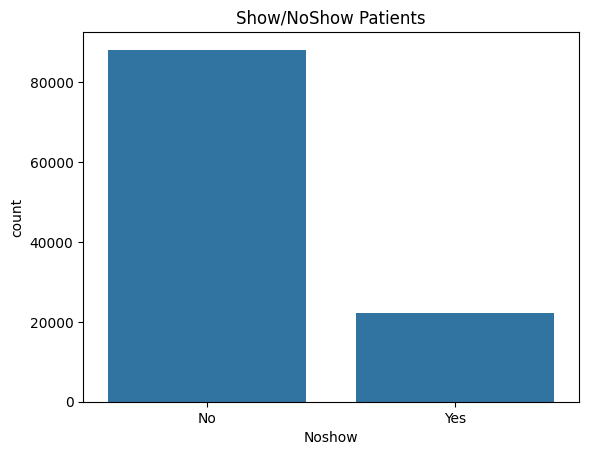

In [ ]:
ax = sns.countplot(x=df.Noshow, data=df)
ax.set_title("Show/NoShow Patients")
plt.show()

/tmp/ipython-input-230-2322124349.py:4: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(x_ticks_labels)


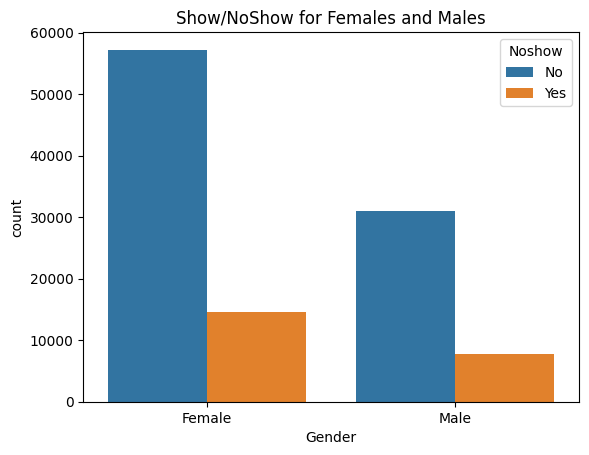

In [ ]:
ax = sns.countplot(x=df.Gender, hue=df.Noshow, data=df)
ax.set_title("Show/NoShow for Females and Males")
x_ticks_labels=['Female', 'Male']
ax.set_xticklabels(x_ticks_labels)
plt.show()

In [ ]:
showedup=df['Noshow']=='No'
didnotshowup=df['Noshow']=='Yes'

In [ ]:
df[showedup]['Age'].mean()


np.float64(37.790504154999034)

In [ ]:
df[didnotshowup]['Age'].mean()

np.float64(34.31766656212196)

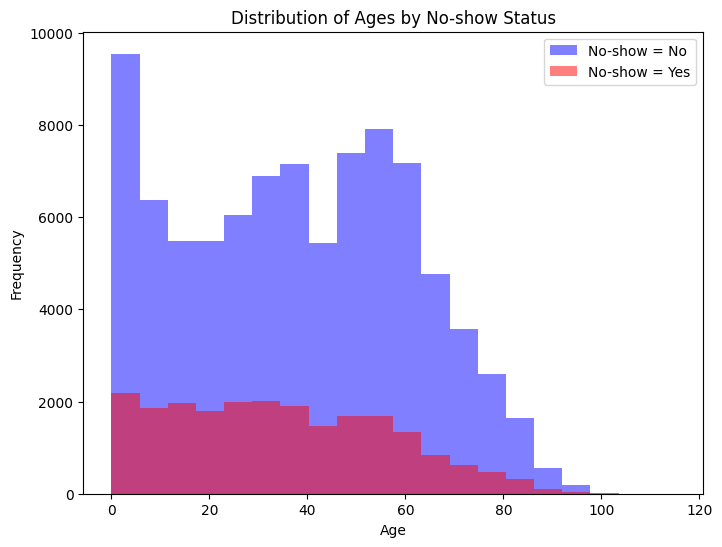

In [ ]:
# Filter rows where 'No-show' is 'No' and plot histogram
plt.figure(figsize=(8, 6))
plt.hist(df[showedup]['Age'], bins=20, color='blue', alpha=0.5, label='No-show = No')

# Filter rows where 'No-show' is 'Yes' and plot histogram
plt.hist(df[didnotshowup]['Age'], bins=20, color='red', alpha=0.5, label='No-show = Yes')

plt.title('Distribution of Ages by No-show Status')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.legend()

plt.show()

In [ ]:
df[showedup].groupby(['Hypertension','Diabetes'])['Age'].mean()

Hypertension  Diabetes
0             0           31.510433
              1           53.666952
1             0           59.702144
              1           63.406361
Name: Age, dtype: float64

In [ ]:
df[didnotshowup].groupby(['Hypertension','Diabetes'])['Age'].mean()

Hypertension  Diabetes
0             0           28.834155
              1           49.183391
1             0           58.377043
              1           62.820333
Name: Age, dtype: float64

Text(0, 0.5, 'mean age')

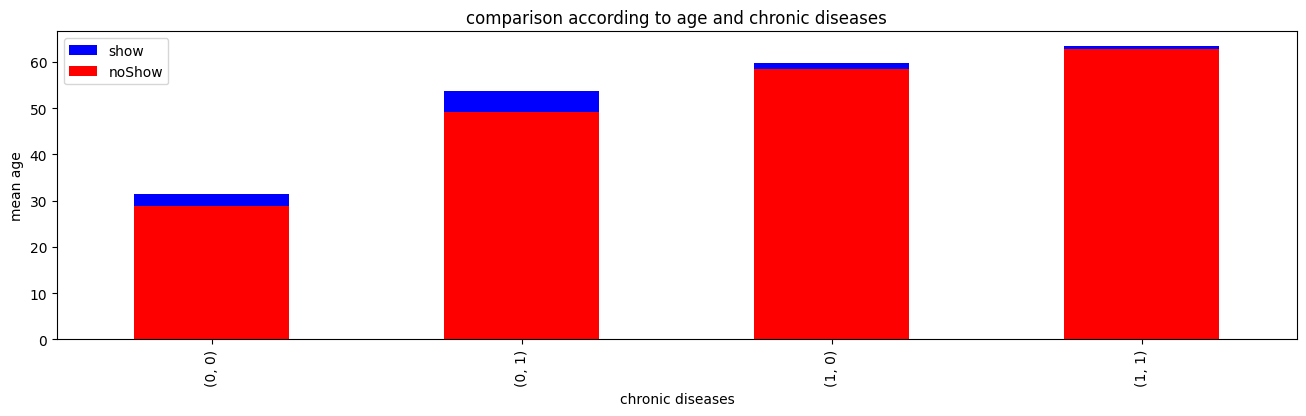

In [ ]:
#does age and chronic diseases affect the attendance together?
plt.figure(figsize=(16,4))
df[showedup].groupby(['Hypertension','Diabetes'])['Age'].mean().plot(kind = 'bar',color='blue', label= 'show')
df[didnotshowup].groupby(['Hypertension','Diabetes'])['Age'].mean().plot(kind = 'bar',color='red', label= 'noShow')
plt.legend()
plt.title('comparison according to age and chronic diseases')
plt.xlabel('chronic diseases')
plt.ylabel('mean age')

Text(0, 0.5, 'Patients Number')

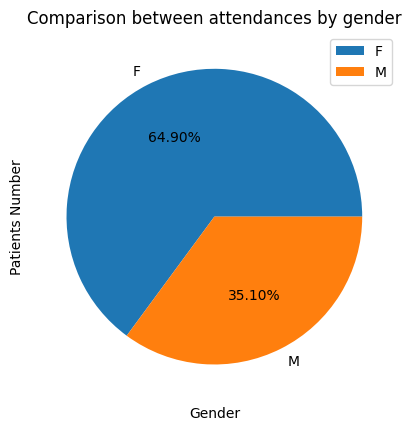

In [ ]:
#what is the precentage of gender attending?
df['Gender'][showedup].value_counts(normalize=True).plot(kind='pie', label = 'show', autopct='%.2f%%')
plt.legend()
plt.title('Comparison between attendances by gender')
plt.xlabel('Gender')
plt.ylabel('Patients Number')

Text(0, 0.5, 'Patient No.')

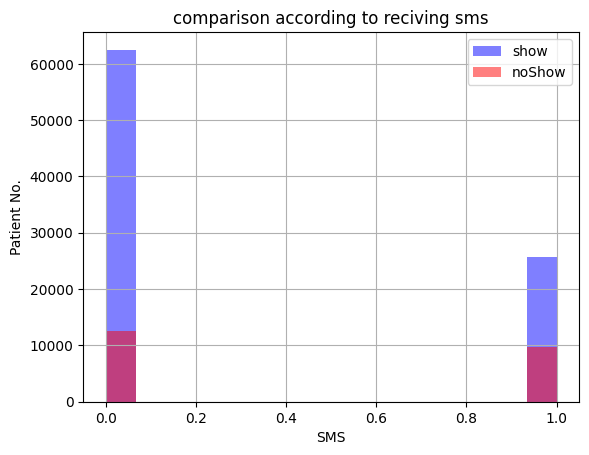

In [ ]:
#does reciving sms affect the attendance?
df['SMSReceived'][showedup].hist(alpha = .5, bins = 15, color = 'blue', label = 'show')
df['SMSReceived'][didnotshowup].hist(alpha = .5, bins = 15, color = 'red', label = 'noShow')
plt.legend()
plt.title('comparison according to reciving sms')
plt.xlabel('SMS')
plt.ylabel('Patient No.')

Text(0, 0.5, 'Patient No.')

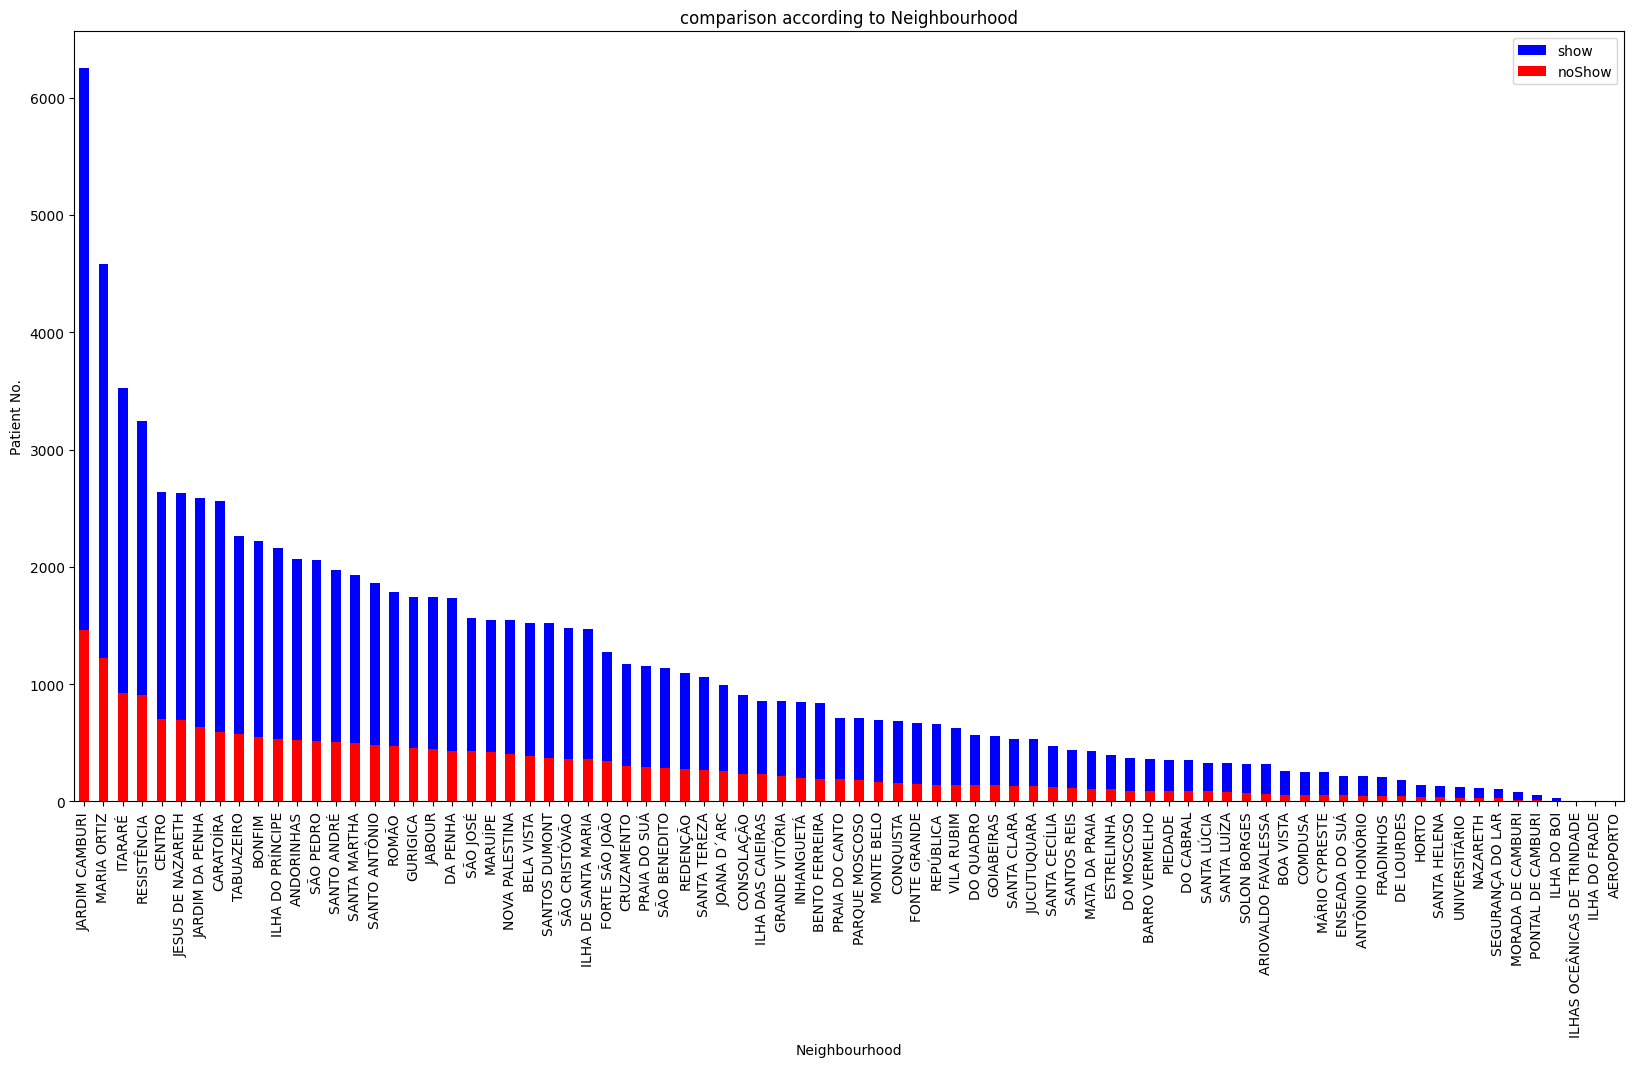

In [ ]:
#does neighbourhood affect the attendance?
plt.figure(figsize=(20,10))
df['Neighbourhood'][showedup].value_counts().plot(kind='bar', color = 'blue', label = 'show')
df['Neighbourhood'][didnotshowup].value_counts().plot(kind='bar', color = 'red', label = 'noShow')
plt.legend()
plt.title('comparison according to Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Patient No.')

Text(0, 0.5, 'patients no.')

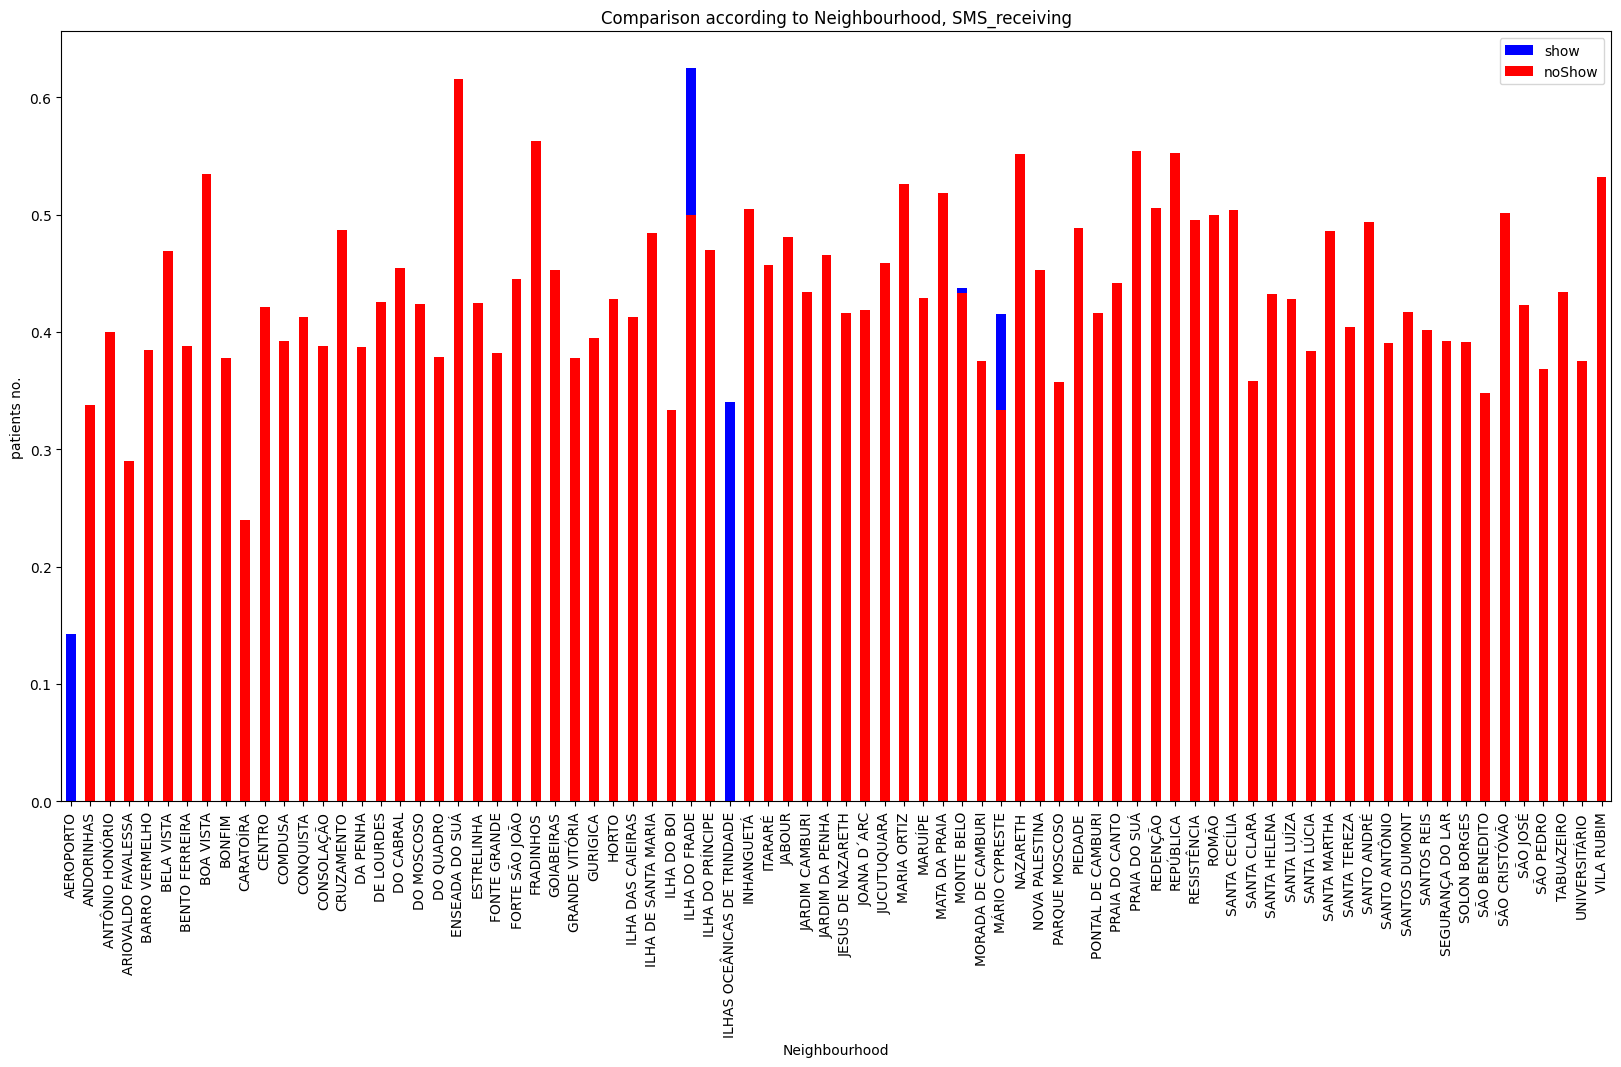

In [ ]:
plt.figure(figsize=(20,10))
df[showedup].groupby('Neighbourhood').SMSReceived.mean().plot(kind = 'bar', color = 'blue', label = 'show')
df[didnotshowup].groupby('Neighbourhood').SMSReceived.mean().plot(kind = 'bar', color = 'red', label = 'noShow')
plt.legend()
plt.title('Comparison according to Neighbourhood, SMS_receiving')
plt.xlabel('Neighbourhood')
plt.ylabel('patients no.')

Text(0, 0.5, 'mean Age')

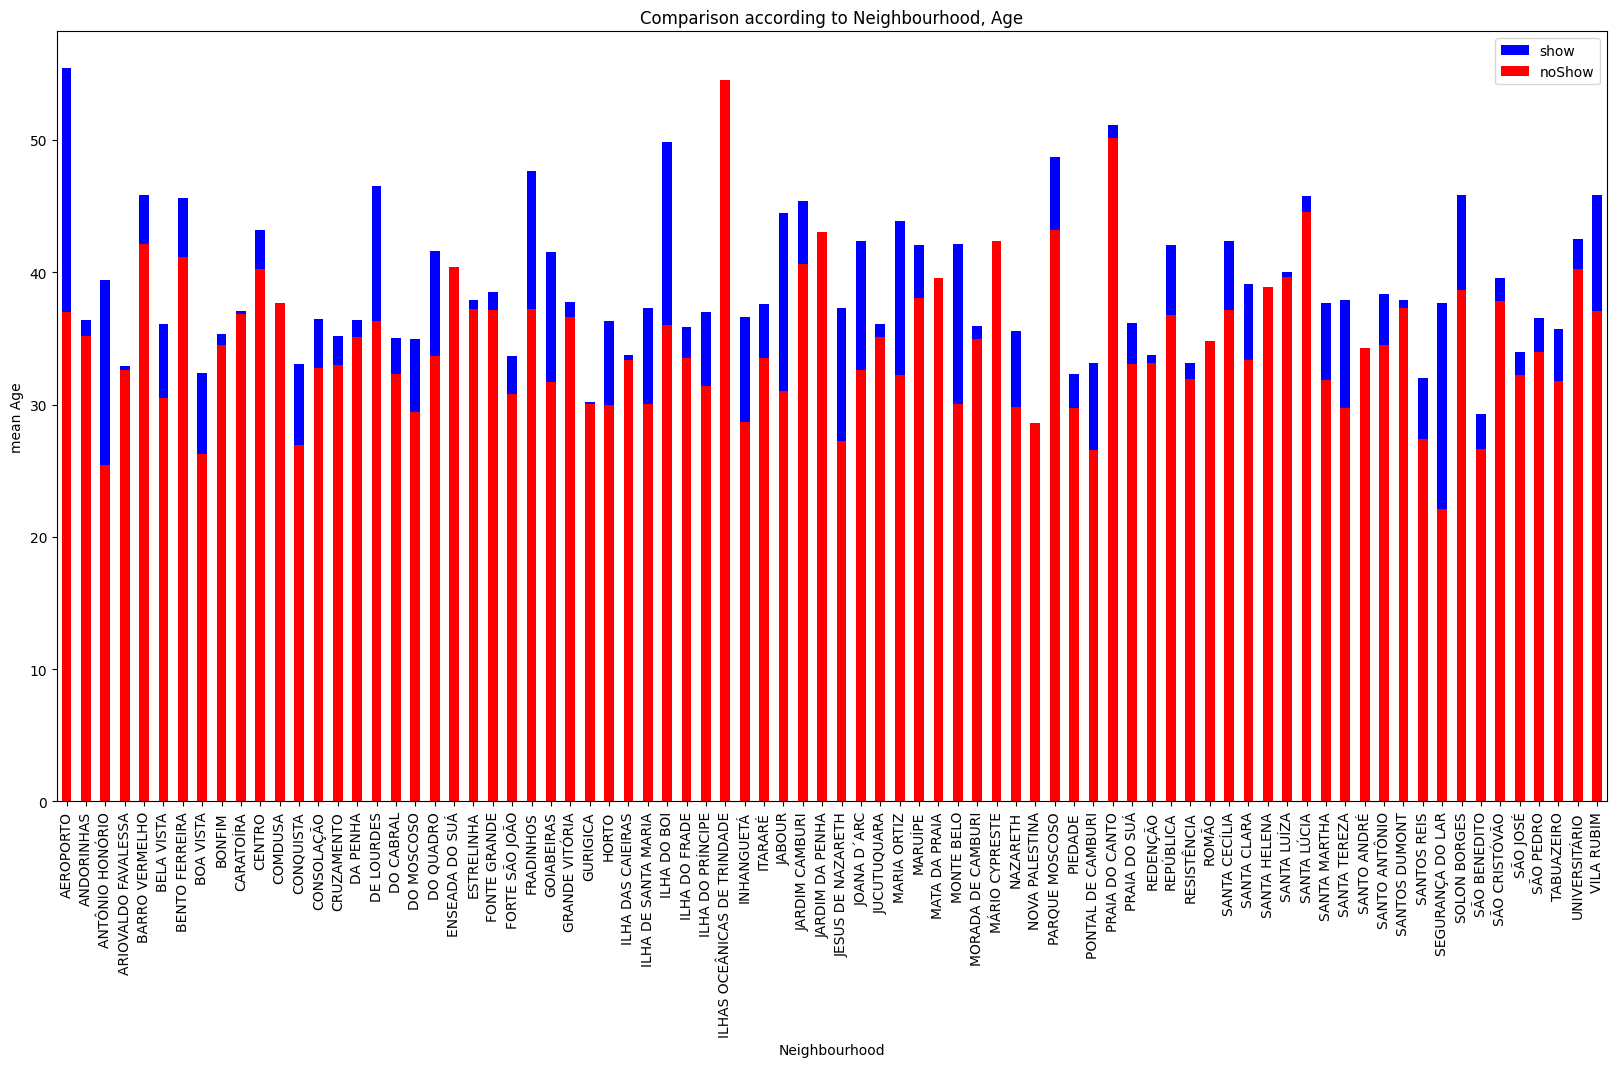

In [ ]:
plt.figure(figsize=(20,10))
df[showedup].groupby('Neighbourhood').Age.mean().plot(kind = 'bar', color = 'blue', label = 'show')
df[didnotshowup].groupby('Neighbourhood').Age.mean().plot(kind = 'bar', color = 'red', label = 'noShow')
plt.legend()
plt.title('Comparison according to Neighbourhood, Age')
plt.xlabel('Neighbourhood')
plt.ylabel('mean Age')

#Conclusions:

Neighbourhood has a great effect on attendance or not.

Number of showing patients from specific neighbourhood affected by receving SMS and ages.

Age has a clear influence on the showing rate.

Number of showing patients without reciving sms is greater than showing patients with reciving sms, which mean that we need to revisit our sms campaign.

No clear correlation between showing and gender, chronic diseases, enrollement in the welfare program.

In [ ]:
# Use `LabelEncoder` to encode labels with value between 0 and n_classes-1.
#Gender
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
#Neighbourhood
le = LabelEncoder()
df['Neighbourhood'] = le.fit_transform(df['Neighbourhood'])


#NoShow
le = LabelEncoder()
df['Noshow'] = le.fit_transform(df['Noshow'])

#model building

In [ ]:
# Get the Dependent and Independent Features.
x= df.drop(['Noshow'], axis=1)
y = df['Noshow']

In [ ]:
x

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSReceived
0,0,62,39,0,1,0,0,0,0
1,1,56,39,0,0,0,0,0,0
2,0,62,45,0,0,0,0,0,0
3,0,8,54,0,0,0,0,0,0
4,0,56,39,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...
110522,0,56,43,0,0,0,0,0,1
110523,0,51,43,0,0,0,0,0,1
110524,0,21,43,0,0,0,0,0,1
110525,0,38,43,0,0,0,0,0,1


In [ ]:
y

,Noshow
0,0
1,0
2,0
3,0
4,0
...,...
110522,0
110523,0
110524,0
110525,0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.33, random_state=0)

#XGBOOST

Training Score 0.7969264840922595
Testing Score 
 0.8008170203432582
0.8008170203432582


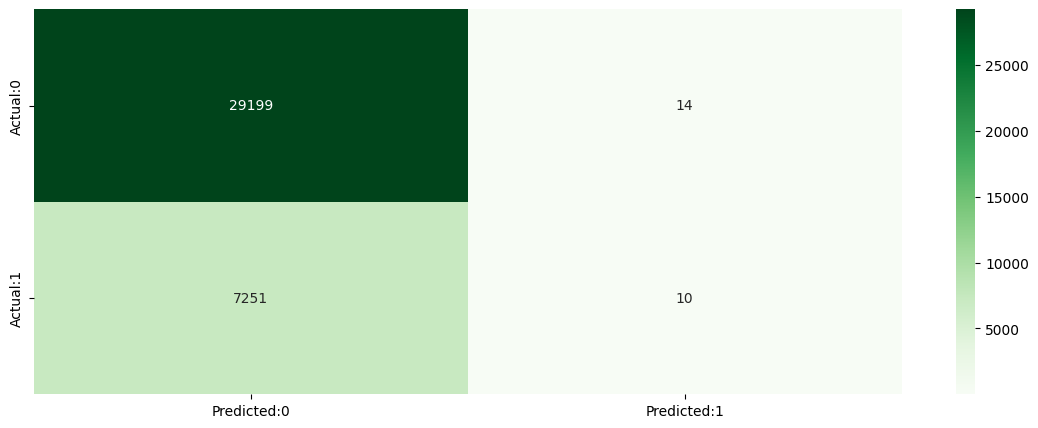

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score

xgboost = GradientBoostingClassifier(random_state=0)
xgboost.fit(X_train, y_train)
#==
#Score
#==
xgboost_score = xgboost.score(X_train, y_train)
xgboost_test = xgboost.score(X_test, y_test)
#==
#testing model
#==
y_pred = xgboost.predict(X_test)
#==
#evaluation
#==
cm = confusion_matrix(y_test,y_pred)
print('Training Score',xgboost_score)
print('Testing Score \n',xgboost_test)

#===
#Confusion Matrix
plt.figure(figsize=(14,5))

conf_matrix = pd.DataFrame(data=cm,columns=['Predicted:0','Predicted:1'],index=['Actual:0','Actual:1'])
sns.heatmap(conf_matrix, annot=True,fmt='d',cmap="Greens");

print(accuracy_score(y_test,y_pred))

In [ ]:
df['Gender']

,Gender
0,0
1,1
2,0
3,0
4,0
...,...
110522,0
110523,0
110524,0
110525,0


#randomforestclassifier

In [ ]:
forest = RandomForestClassifier(n_estimators = 100)

In [ ]:
forest.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
forest_score = forest.score(X_train, y_train)

In [ ]:
forest_score

0.85599308593961

In [ ]:
forest_test=forest.score(X_test, y_test)

In [ ]:
forest_test

0.7583484125678566

In [ ]:
y_pred = forest.predict(X_test)

In [ ]:
cm = confusion_matrix(y_test,y_pred)

In [ ]:
print(cm)

[[26548  2665]
 [ 6149  1112]]


In [ ]:
print("training score is",forest_score)
print("testing score is",forest_test)

training score is 0.85599308593961
testing score is 0.7583484125678566


#logisticregression

In [ ]:
model=LogisticRegression()

In [ ]:
model.fit(X_train,y_train)

LogisticRegression()

In [ ]:
train_score=model.score(X_train,y_train)

In [ ]:
train_score

0.7966564036082753

In [ ]:
test_score=model.score(X_test,y_test)

In [ ]:
test_score

0.8009266875034271